In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re as re
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [81]:
train = pd.read_csv('train.csv')
train.head()
test = pd.read_csv('test.csv')
data = train.drop('Survived', axis=1).append(test)
data.isnull().sum()/len(data)*100
print(train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [82]:
#Fill age
meanAge = data['Age'].mean()
stdAge = data['Age'].std()
numMissingAge = data['Age'].isnull().sum()

randomAgeArray = np.random.randint(meanAge - stdAge, meanAge + stdAge, size=numMissingAge)

data['Age'][np.isnan(data['Age'])] = randomAgeArray
data['Age'] = data['Age'].astype(int)

train['Age'] = data['Age'][:891]
test['Age'] = data['Age'][891:]

print(train.isnull().sum()/len(train)*100)
print(test.isnull().sum()/len(test)*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


/home/jason/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [83]:
# fill embarked
#print(data['Embarked'].mode().to_string()[-1])
data['Embarked'].fillna(data['Embarked'].mode().to_string()[-1], inplace=True)

train['Embarked'] = data['Embarked'][:891]
print(train.isnull().sum()/len(train)*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64


In [84]:
# create group survival data
data['Group_survived'] = 0
data['Has_group'] = 0
for name, obj in train[['Survived', 'Ticket']].groupby('Ticket'):
    if (len(obj)>1):
        data.loc[data['Ticket']==name, 'Group_survived'] = obj['Survived'].mean()
        data.loc[data['Ticket']==name, 'Has_group'] = 1

train['Group_survived'] = data['Group_survived'][:891]
test['Group_survived'] = data['Group_survived'][891:]
train['Has_group'] = data['Has_group'][:891]
test['Has_group'] = data['Has_group'][891:]

print(train[:10])
print(test[:10])

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   
5                                   Moran, Mr. James    male   20      0   
6                            McCarthy, Mr. Timothy J    male   54      

In [85]:
# mark groups that only appear in test set
for name, obj in test[['Ticket']].groupby('Ticket'):
    if (len(obj)>1):
        data.loc[data['Ticket']==name, 'Group_survived'] = -1
        data.loc[data['Ticket']==name, 'Has_group'] = 1

test['Group_survived'] = data['Group_survived'][891:]
test['Has_group'] = data['Has_group'][891:]

for name, obj in test[['Group_survived', 'Has_group', 'Ticket']].groupby('Ticket'):
    if (len(obj)>1):
        print(name)
        print('-'*10)
        print(obj)
        print('-'*10)

112378
----------
     Group_survived  Has_group  Ticket
368            -1.0          1  112378
402            -1.0          1  112378
----------
113503
----------
     Group_survived  Has_group  Ticket
74             -1.0          1  113503
75             -1.0          1  113503
218            -1.0          1  113503
407            -1.0          1  113503
----------
113781
----------
     Group_survived  Has_group  Ticket
141            -1.0          1  113781
306            -1.0          1  113781
----------
11778
----------
     Group_survived  Has_group Ticket
100            -1.0          1  11778
177            -1.0          1  11778
----------
12749
----------
     Group_survived  Has_group Ticket
308            -1.0          1  12749
390            -1.0          1  12749
----------
13050
----------
     Group_survived  Has_group Ticket
118            -1.0          1  13050
270            -1.0          1  13050
----------
13236
----------
     Group_survived  Has_group Ticket
34 

In [86]:
print(train.isnull().sum()/len(train)*100)
print(test.isnull().sum()/len(test)*100)

PassengerId        0.000000
Survived           0.000000
Pclass             0.000000
Name               0.000000
Sex                0.000000
Age                0.000000
SibSp              0.000000
Parch              0.000000
Ticket             0.000000
Fare               0.000000
Cabin             77.104377
Embarked           0.000000
Group_survived     0.000000
Has_group          0.000000
dtype: float64
PassengerId        0.000000
Pclass             0.000000
Name               0.000000
Sex                0.000000
Age                0.000000
SibSp              0.000000
Parch              0.000000
Ticket             0.000000
Fare               0.239234
Cabin             78.229665
Embarked           0.000000
Group_survived     0.000000
Has_group          0.000000
dtype: float64


In [87]:
# fill fare
data['Fare'].fillna(data['Fare'].median(), inplace=True)

test['Fare'] = data['Fare'][891:]
print(train.isnull().sum()/len(train)*100)
print(test.isnull().sum()/len(test)*100)

PassengerId        0.000000
Survived           0.000000
Pclass             0.000000
Name               0.000000
Sex                0.000000
Age                0.000000
SibSp              0.000000
Parch              0.000000
Ticket             0.000000
Fare               0.000000
Cabin             77.104377
Embarked           0.000000
Group_survived     0.000000
Has_group          0.000000
dtype: float64
PassengerId        0.000000
Pclass             0.000000
Name               0.000000
Sex                0.000000
Age                0.000000
SibSp              0.000000
Parch              0.000000
Ticket             0.000000
Fare               0.000000
Cabin             78.229665
Embarked           0.000000
Group_survived     0.000000
Has_group          0.000000
dtype: float64


In [88]:
# create fare bins and age bins
data['FareBin'] = pd.qcut(data['Fare'], 5)

label = LabelEncoder()
data['FareBin_Code'] = label.fit_transform(data['FareBin'])

train['FareBin_Code'] = data['FareBin_Code'][:891]
test['FareBin_Code'] = data['FareBin_Code'][891:]

data['AgeBin'] = pd.qcut(data['Age'], 4)

data['AgeBin_Code'] = label.fit_transform(data['AgeBin'])

train['AgeBin_Code'] = data['AgeBin_Code'][:891]
test['AgeBin_Code'] = data['AgeBin_Code'][891:]

data.drop(['AgeBin', 'Age', 'FareBin', 'Fare'], inplace=True, axis=1)
train.drop(['Age', 'Fare'], inplace=True, axis=1)
test.drop(['Age', 'Fare'], inplace=True, axis=1)

print(data.head())
print('-'*10)
print(train.head())
print('-'*10)
print(test.head())
print('-'*10)

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex  SibSp  Parch            Ticket Cabin Embarked  Group_survived  \
0    male      1      0         A/5 21171   NaN        S             0.0   
1  female      1      0          PC 17599   C85        C             0.0   
2  female      0      0  STON/O2. 3101282   NaN        S             0.0   
3  female      1      0            113803  C123        S             0.5   
4    male      0      0            373450   NaN        S             0.0   

   Has_group  FareBin_Code  AgeBin_Code  
0          0             0            

In [89]:
# remove Cabin column
data.drop('Cabin', inplace=True, axis=1)
train.drop('Cabin', inplace=True, axis=1)
test.drop('Cabin', inplace=True, axis=1)

In [90]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Embarked,Group_survived,Has_group,FareBin_Code,AgeBin_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,S,0.000000,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,0.000000,0,4,2
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,S,0.000000,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,S,0.500000,1,4,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,S,0.000000,0,1,2
5,6,0,3,"Moran, Mr. James",male,0,0,330877,Q,0.000000,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,S,0.000000,0,4,3
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,S,0.000000,1,2,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,S,1.000000,1,2,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,C,0.500000,1,3,0


In [91]:
# add family size
data['FamilySize'] = data['SibSp'] + data['Parch']

train['FamilySize'] = data['FamilySize'][:891]
test['FamilySize'] = data['FamilySize'][891:]

# convert sex
mapping = {'female': 1, 'male': 0}
train['Sex'] = train['Sex'].map(mapping)
test['Sex'] = test['Sex'].map(mapping)

# drop unneccessary columns
train.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis=1, inplace=True)
test.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [92]:
# output to preprocessed data
train.to_csv('processed_train.csv', index=False)
test.to_csv('processed_test.csv', index=False)

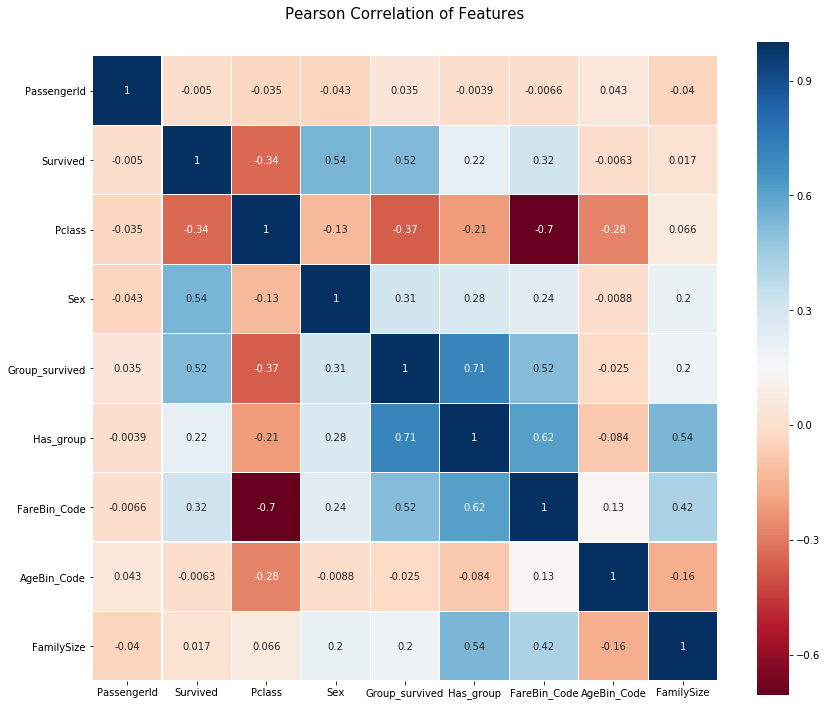

In [93]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)